## ATSC 528 HW 4 - CHAOS THEORY  
Author: Brian T. Horan  
Created: 11/08/2022  
Assignment: ATSC 528 HW 4  

Purpose: To show how numerical simulations can diverge in a simple numerical model. Initial conditions are prescrobed based on the assignment, and calculations are performed based on forward in time finite differenced equations. The results are stored in NP arrays an plotted for each x initialization. Plots show divergence in solution as soon as 50ish time steps into the simulation.

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles


In [1]:
#Define Constants 
global A
global B
global F
global G

A = 0.25
B = 4.0
F = 8.0
G = 1.0

In [3]:
#define initial conditions
x0 = 2.5
x1 = 2.49

y0 = 1.0
z0 = 0.0

In [5]:
dt = (4/(24*5)) #hours
num_xyz = int(120/5) / dt
num_xyz = int(num_xyz)

In [6]:
#Set the empty array for the solutions at each time step (x, y, z, sim)
sln_x = np.empty((num_xyz, 2))
sln_y = np.empty((num_xyz, 2))
sln_z = np.empty((num_xyz, 2))
#set initial conditions in the slns arrays
sln_x[0,0] = x0
sln_x[0,1] = x1
sln_y[0,0] = y0
sln_y[0,1] = y0
sln_z[0,0] = z0
sln_z[0,1] = z0


In [7]:
#calculate the forward difference passes
for j in range(2):
    for i in range(1, num_xyz):
        x_plus_one = sln_x[i-1,j] + (dt * ((-sln_y[i-1,j]**2) - (sln_z[i-1,j]**2) - (A*sln_x[i-1,j]) + (A*F)))
        sln_x[i,j] = x_plus_one
        y_plus_one = sln_y[i-1,j] + (dt * ((sln_x[i-1,0]*sln_y[i-1,j]) - (B*sln_x[i-1, j]*sln_z[i-1, j]) - (sln_y[i-1, j]) + G))
        sln_y[i,j] = y_plus_one
        z_plus_one = sln_z[i-1,j] + (dt * ((B*sln_x[i-1,j]*sln_y[i-1,j]) + (sln_x[i-1,j] * sln_z[i-1,j]) - (sln_z[i-1,j])))
        sln_z[i,j] = z_plus_one

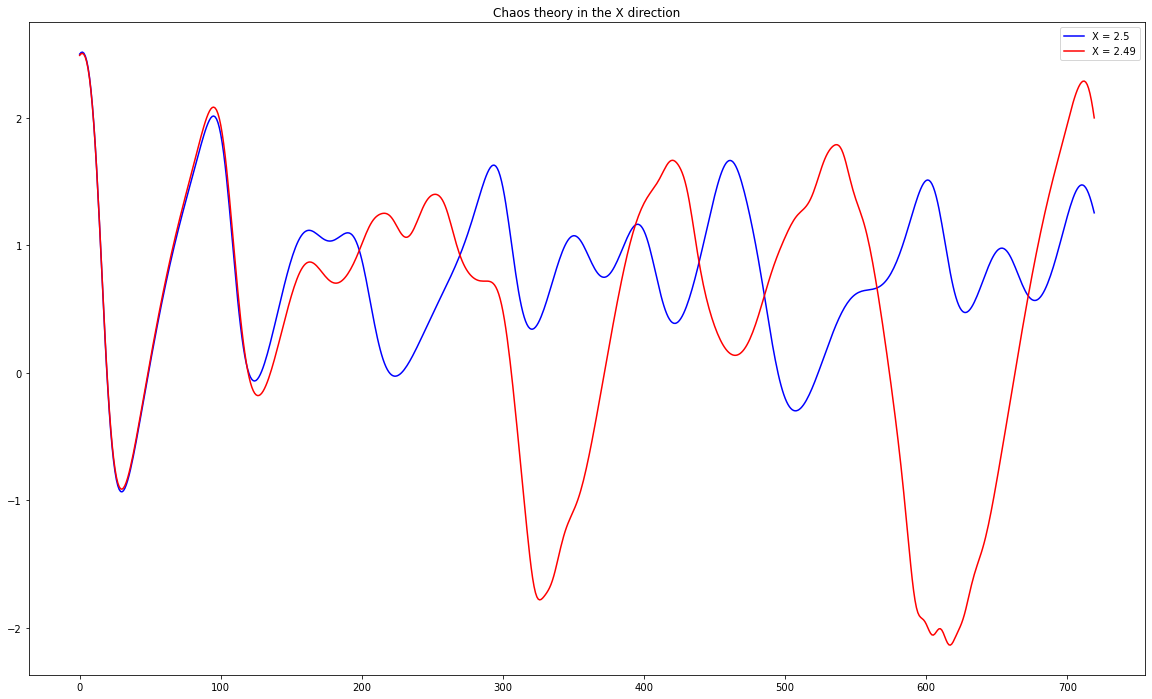

In [8]:
fig = plt.figure(figsize = (20,12))

plt.plot(sln_x[:,0], c = 'b', label = 'X = 2.5')
plt.plot(sln_x[:,1], c = 'r', label = 'X = 2.49')

plt.legend()
plt.title('Chaos theory in the X direction')
plt.show()

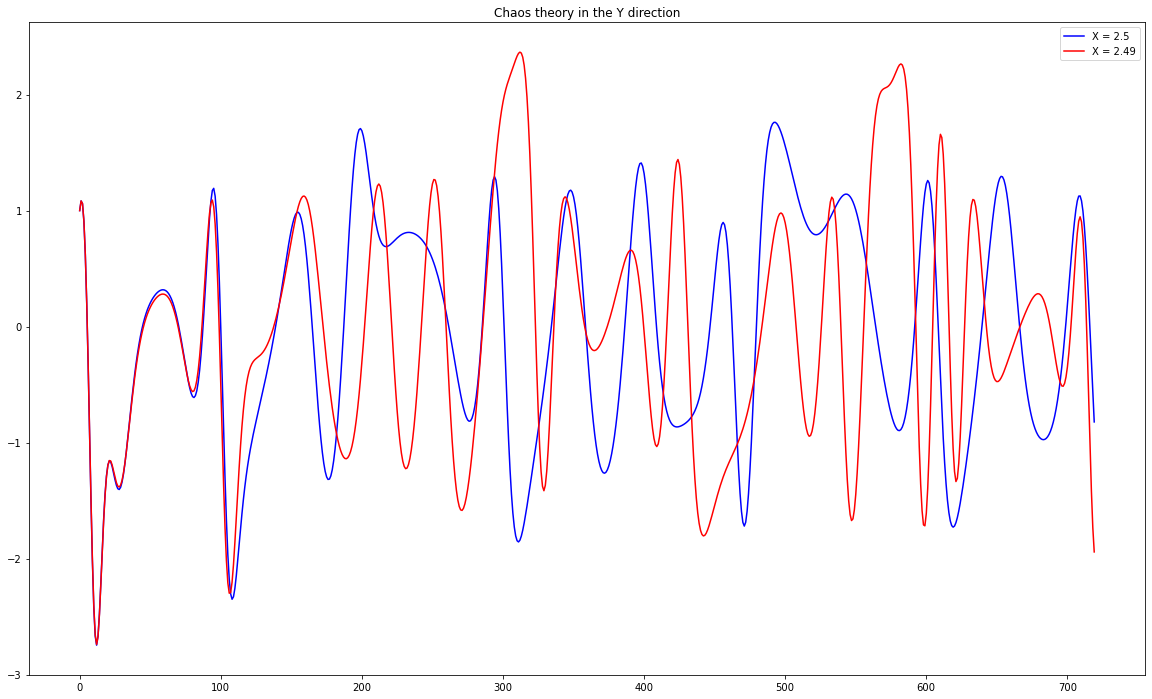

In [10]:
fig = plt.figure(figsize = (20,12))

plt.plot(sln_y[:,0], c = 'b', label = 'X = 2.5')
plt.plot(sln_y[:,1], c = 'r', label = 'X = 2.49')

plt.legend()
plt.title('Chaos theory in the Y direction')
plt.show()

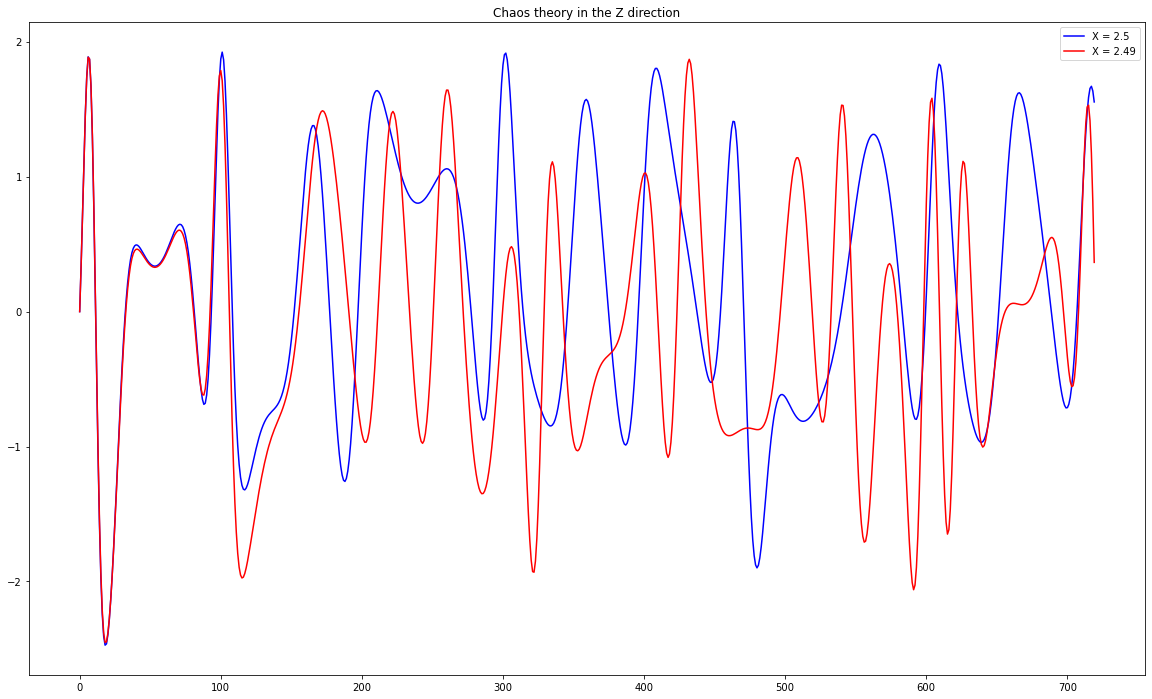

In [11]:
fig = plt.figure(figsize = (20,12))

plt.plot(sln_z[:,0], c = 'b', label = 'X = 2.5')
plt.plot(sln_z[:,1], c = 'r', label = 'X = 2.49')

plt.legend()
plt.title('Chaos theory in the Z direction')
plt.show()

In [4]:
### In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?   
''' The two simulations begin to diverge at about time step 50 of 720'''
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
''' This proves the importance of providing accurate initial conditions 
    for NWP models so we obtain as accurate a representation as possible
    when forecasting the weather through NWP. It shows minor disturbances can cause 
    large changes downstream in time with inappropriately prescribed initial conditions.'''

' This proves the importance of providing accurate initial conditions \n    for NWP models so we obtain as accurate a representation as possible\n    when forecasting the weather through NWP. It shows minor disturbances can cause \n    large changes downstream in time with inappropriately prescribed initial conditions.'